In [431]:
import numpy as np
import pandas as pd
import scanpy as sc

In [153]:
ys = sc.read('/lustre/scratch117/cellgen/team298/SharedFolders/ar32/YS/Submission_Science_1/ys_protein_citeseq_with_scvi_embedding_processed_20220614.h5ad')

In [154]:
meta = pd.read_csv('/lustre/scratch117/cellgen/team298/SharedFolders/ar32/YS/Submission_Science_1/hspc_prim_def_metadata_20220621.csv', index_col=0)

In [155]:
meta['new_index'] = meta.index.str.replace('-1-SIGAG5-SIGAG5','-SIGAD11',regex=True)
meta['new_index'] = meta['new_index'].str.replace('-1-SIGAH5-SIGAH5','-SIGAE11',regex=True)
meta.index = meta['new_index']
del meta['new_index']
meta.index.name = ''

In [156]:
ys.obs['cell_labels_lvl4'] = ys.obs['cell_labels_lvl3'].astype(str)

for celltype in meta['prim_or_def_highest_score'].unique():
    print(celltype)
    meta_sub = meta[meta['prim_or_def_highest_score'].isin([celltype])]
    ys.obs.loc[ys.obs.index.isin(meta_sub.index),'cell_labels_lvl4'] = str(celltype)

def
prim


In [158]:
ys_sub = ys[ys.obs['cell_labels_lvl1'].isin(['Progenitors'])]

In [378]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
sc.settings.set_figure_params(dpi=150)

In [390]:
list(ys_sub.obs['cell_labels_lvl4'].unique())

order = [
 'prim',
'def',
 'MEMP',
 'CMP',
 'lymphoid progenitor',
 'lymphoid- NK/ILC',
'lymphoid- B lin',]
ys_sub.obs['cell_labels_lvl4'] = ys_sub.obs['cell_labels_lvl4'].astype('category').cat.reorder_categories(order) 

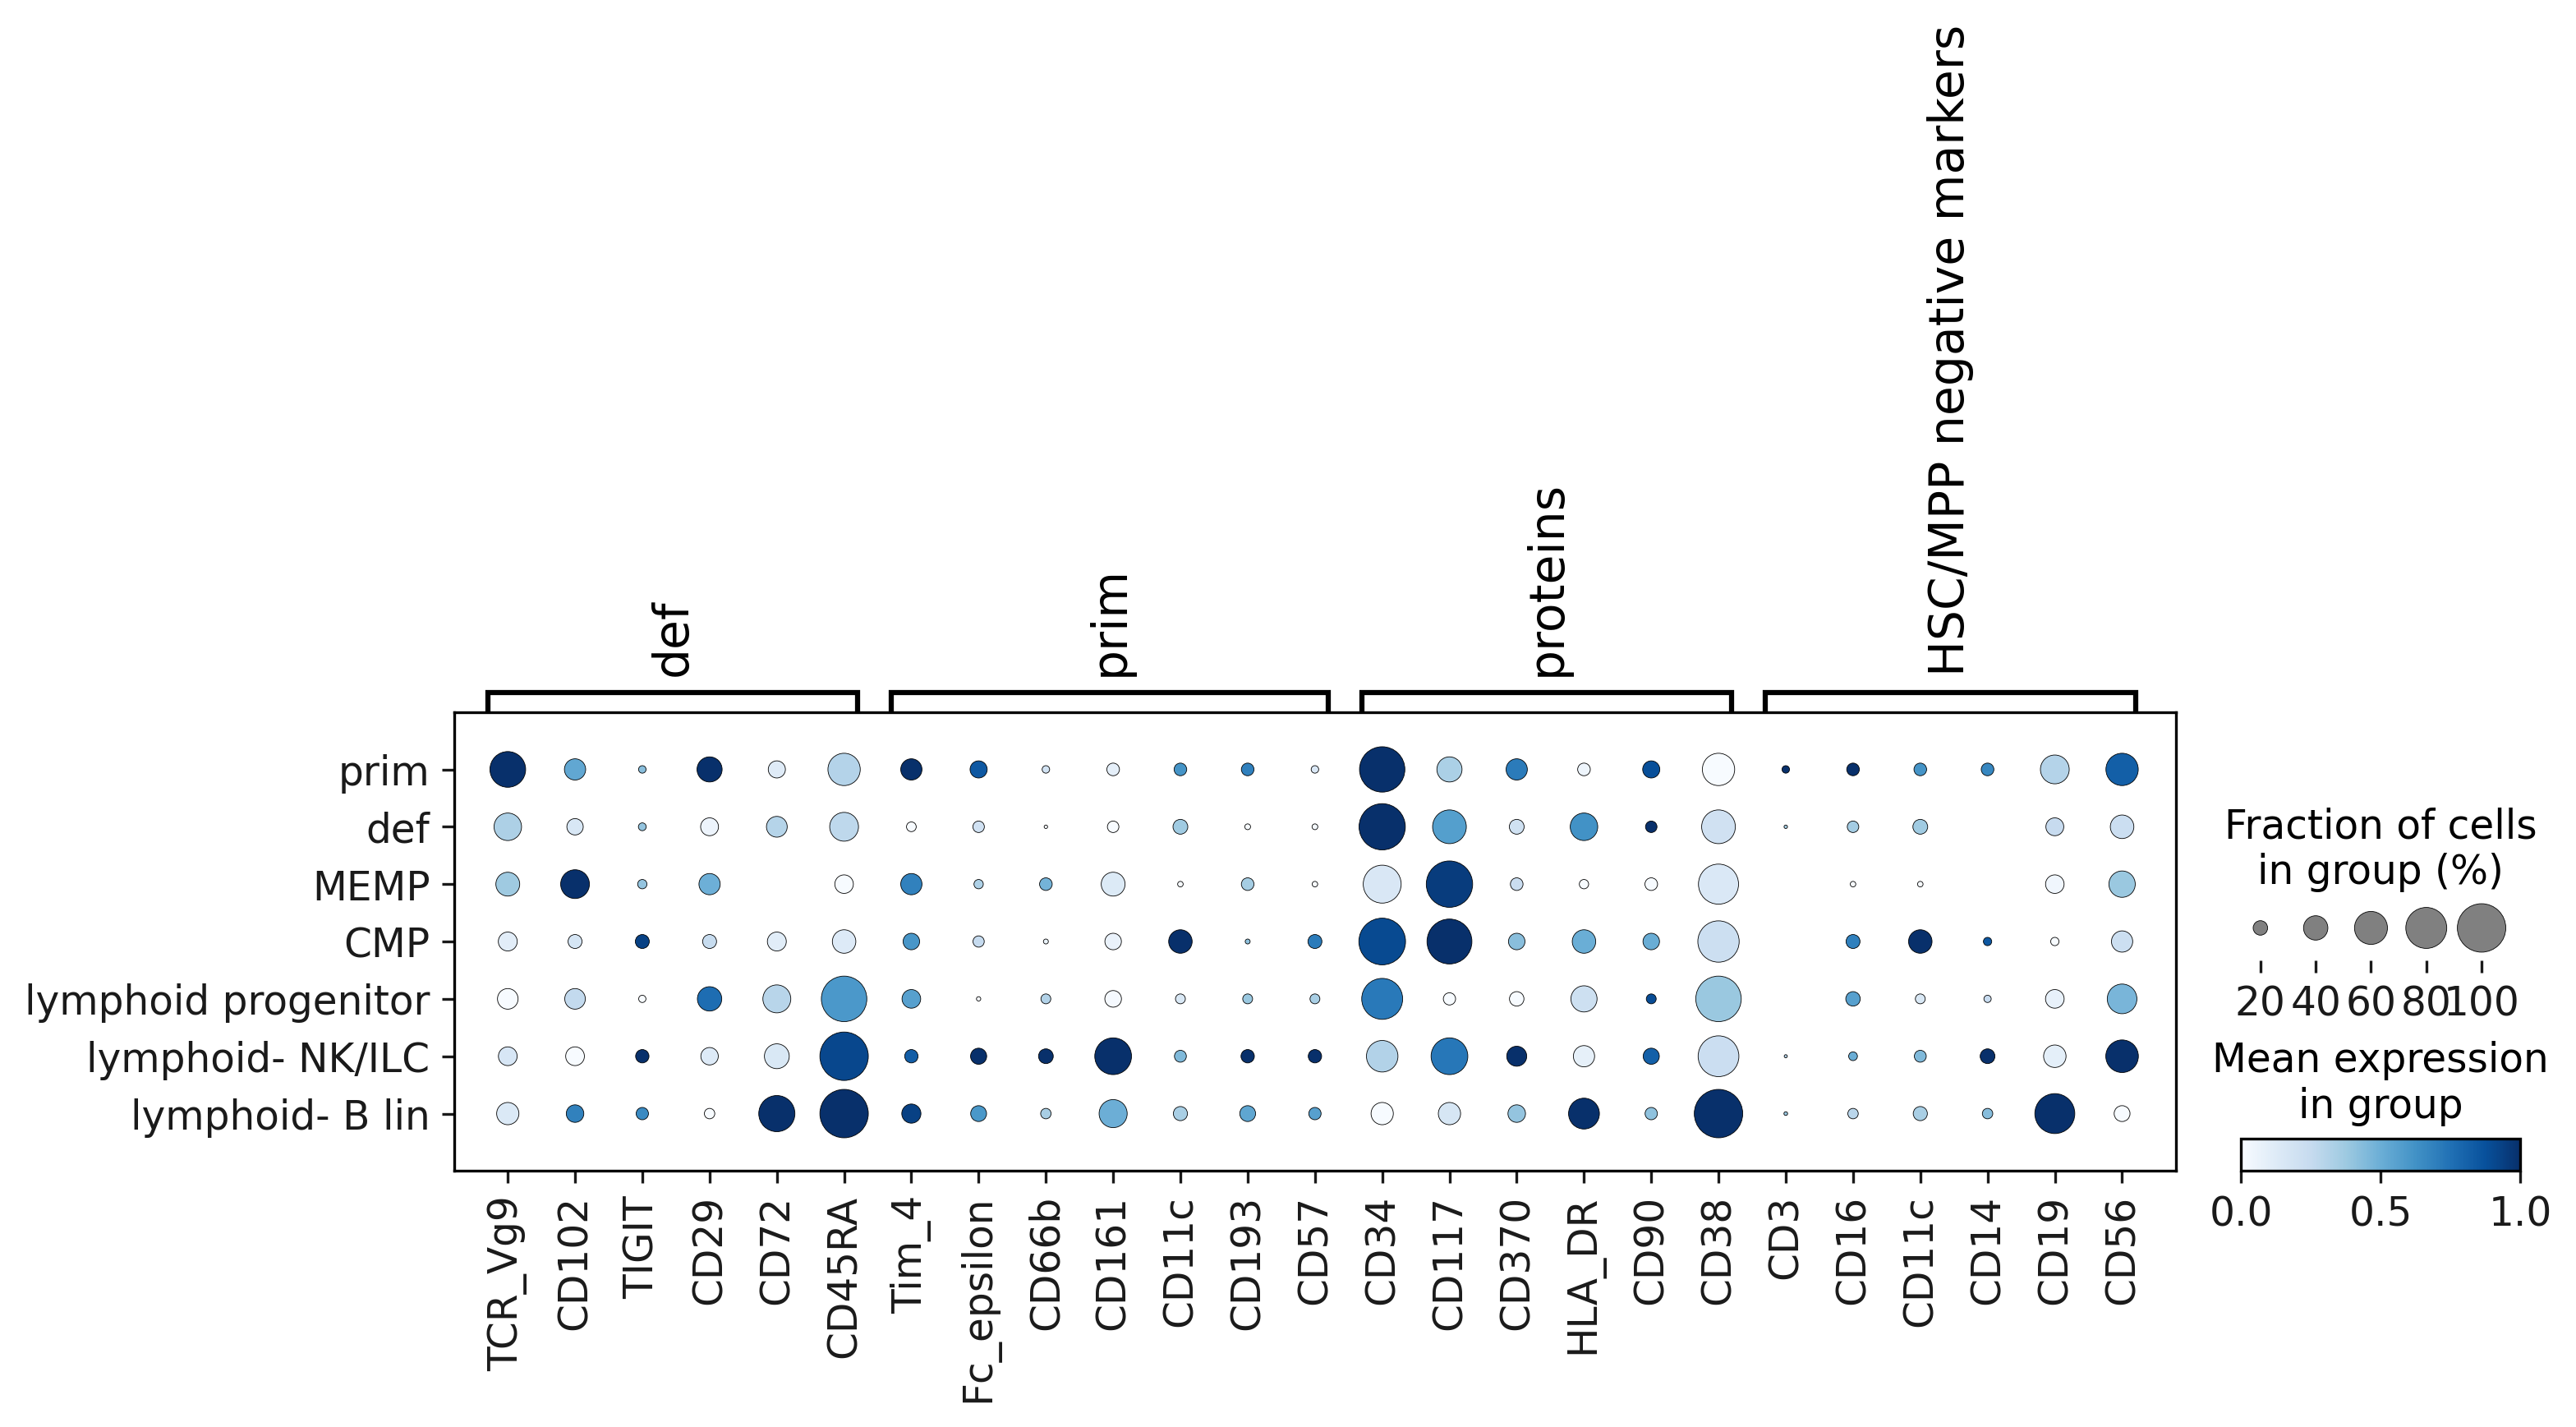

In [393]:
proteins = {
'def' : ['TCR_Vg9','CD102','TIGIT','CD29','CD72','CD45RA'],
'prim' : ['Tim_4','Fc_epsilon','CD66b','CD161','CD11c','CD193','CD57',], #'CD133','CD8','CD206',    
    
'proteins' : [
'CD34',
'CD117',
'CD370',
'HLA_DR',
'CD90',
'CD38',],

'HSC/MPP negative markers' : [
'CD3',
'CD16',
'CD11c',
'CD14',
'CD19',
'CD56',
],
}

sc.pl.dotplot(ys_sub, cmap='Blues', var_names = proteins, groupby='cell_labels_lvl4', use_raw=False,standard_scale='var')

In [559]:
list(ys.obs['cell_labels_lvl4'].unique())

order = [
 'prim',
'def',
 'MEMP',
 'CMP',
 'lymphoid progenitor',
 'lymphoid- NK/ILC',
'lymphoid- B lin',
 'pDC precursor',
'AEC',
 'Endoderm',
 'Erythroid',
 'Fibroblast',
 'HE',
 'Immature_EC',
 'Lymphoid',
 'MK',
 'Macrophage',
 'Mast_cell',
 'Mesothelium',
 'Microglia',
 'Monocyte_0',
 'Monocyte_1',
 'Prolif_Sinusoidal_EC',
 'Sinusoidal_EC',
 'Smooth_Muscle',
 'VWF',
 'early MK',
 'early erythroid',]
ys.obs['cell_labels_lvl4'] = ys.obs['cell_labels_lvl4'].astype('category').cat.reorder_categories(order) 

In [575]:
ys_hspc = ys[ys.obs['cell_labels_lvl4'].isin(['prim','def'])]

In [160]:
ys_progen = ys[ys.obs['cell_labels_lvl4'].isin([ 'prim',
 'prim',
'def',
 'MEMP',
 'CMP',
 'lymphoid progenitor',
 'lymphoid- NK/ILC',
'lymphoid- B lin',
 'pDC precursor',
 'Erythroid',
 'Lymphoid',
 'MK',
 'Macrophage',
 'Mast_cell',
 'Microglia',
 'Monocyte_0',
 'Monocyte_1',
 'early MK',
 'early erythroid'])]

In [161]:
ys_progen.obs['cell_labels_lvl4_mixed'] = ys_progen.obs['cell_labels_lvl1'].astype(str)
progenitors = ['prim',
'def',
 'MEMP',
 'CMP',
 'lymphoid progenitor',
 'lymphoid- NK/ILC',
'lymphoid- B lin',]

for anno in progenitors:
    print(anno)
    ys_progen.obs.loc[ys_progen.obs['cell_labels_lvl4'].isin([anno]),'cell_labels_lvl4_mixed'] = anno

prim
def
MEMP
CMP
lymphoid progenitor
lymphoid- NK/ILC
lymphoid- B lin


/tmp/ipykernel_1024/756121970.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  ys_progen.obs['cell_labels_lvl4_mixed'] = ys_progen.obs['cell_labels_lvl1'].astype(str)


In [164]:
order = ['prim',
'def',
 'lymphoid progenitor', 
'CMP',
 'MEMP',
'lymphoid- NK/ILC',
'lymphoid- B lin',
 'pDC precursor', 
 'Lymphoid',
 'Monocyte',
'Macrophage',
 'Microglia',
 'Mast_cell',
 'MK', 
'Erythroid', ]
ys_progen.obs['cell_labels_lvl4_mixed'] = ys_progen.obs['cell_labels_lvl4_mixed'].astype('category').cat.reorder_categories(order)

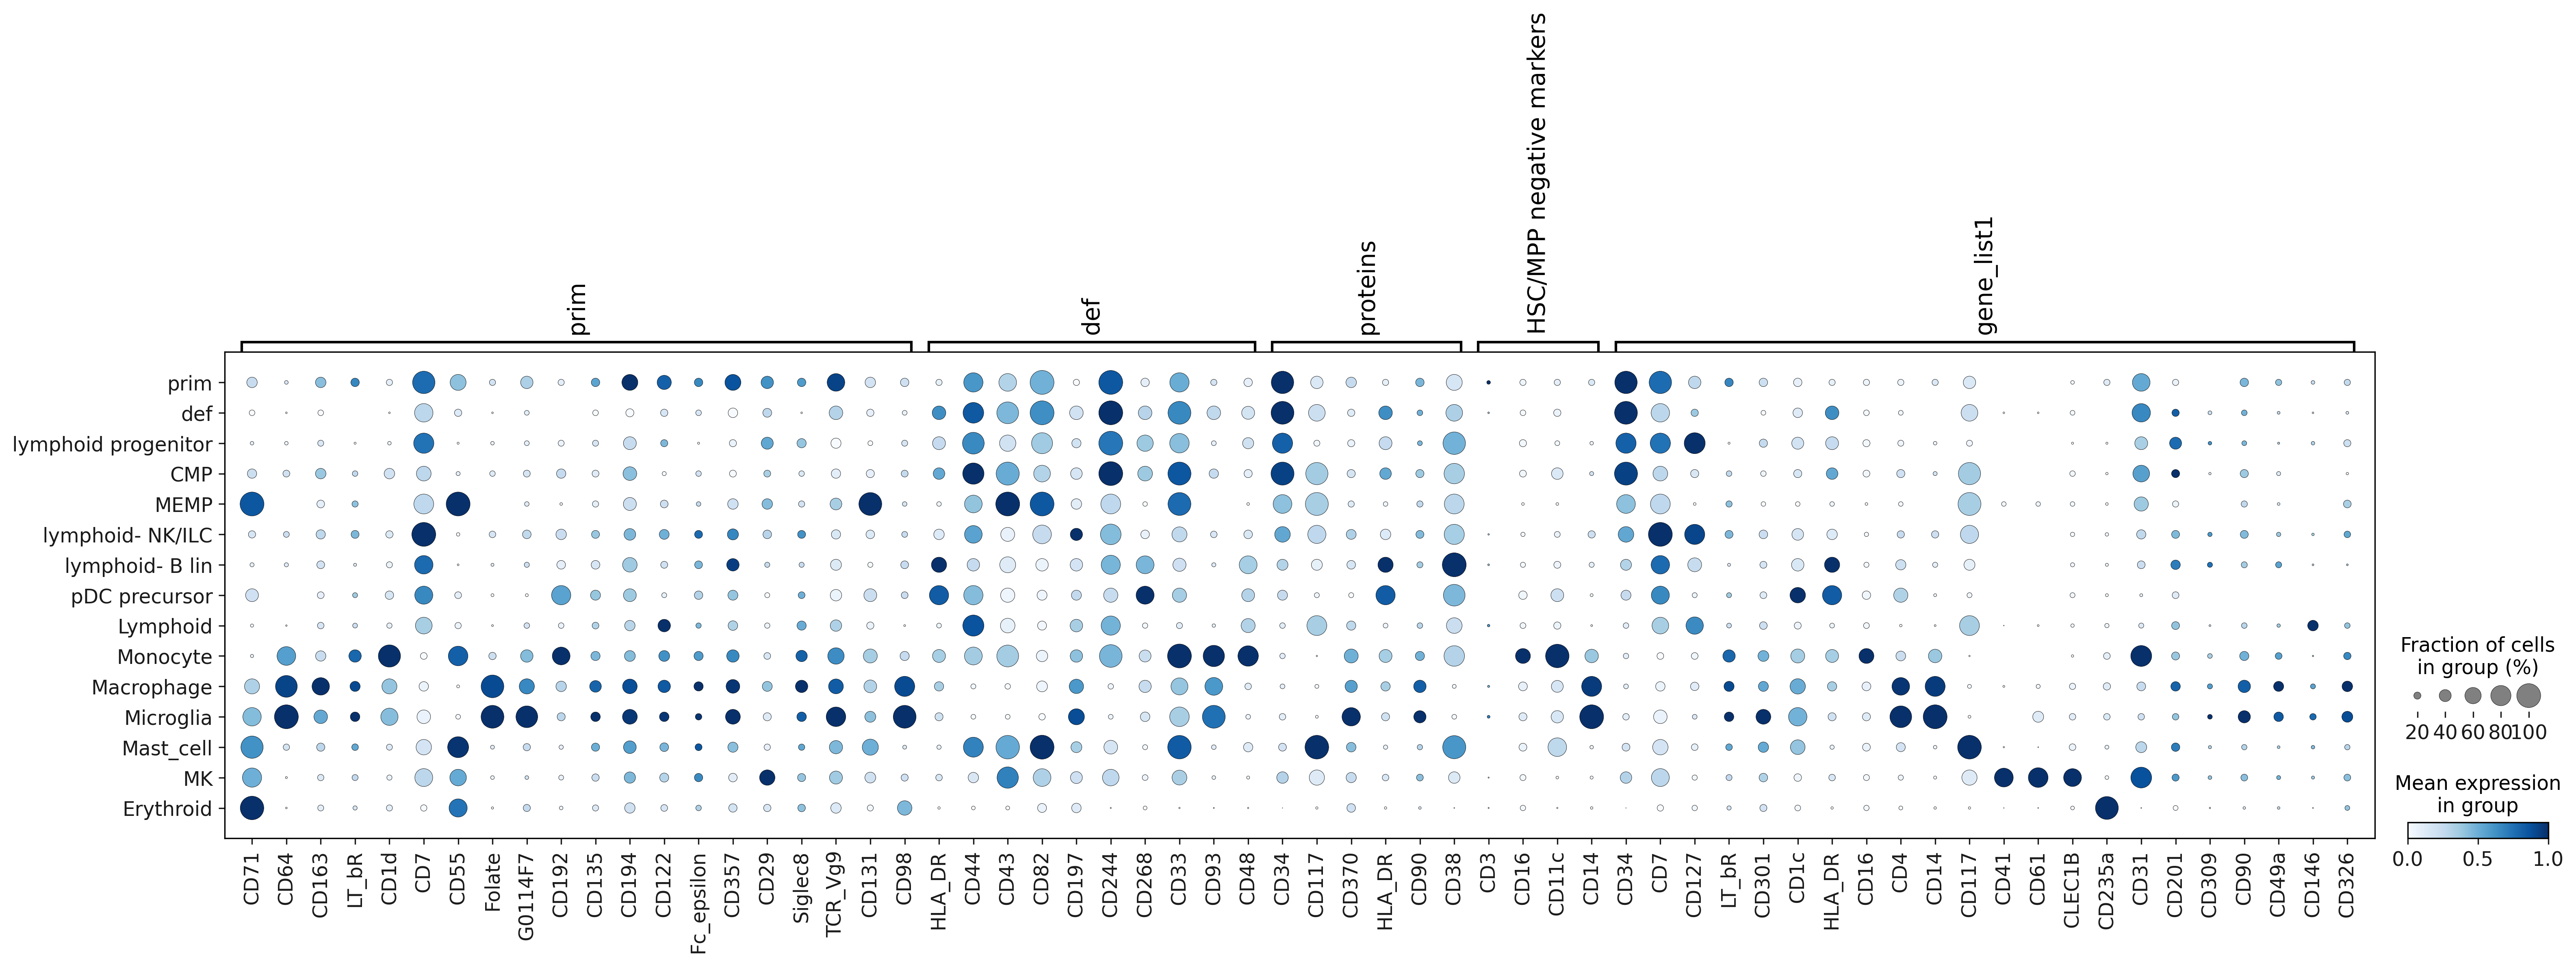

In [621]:
proteins = {
# 'def' : ['TCR_Vg9','CD102','TIGIT','CD29','CD72','CD45RA'],
# 'prim' : ['Tim_4','Fc_epsilon','CD66b','CD161','CD11c','CD193','CD57',], #'CD133','CD8','CD206',    
 'prim': ['CD71',
  'CD64',
  'CD163',
  'LT_bR',
  'CD1d',
  'CD7',
  'CD55',
  'Folate',
  'G0114F7',
  'CD192',
  'CD135',
  'CD194',
  'CD122',
  'Fc_epsilon',
  'CD357',
  'CD29',
  'Siglec8',
  'TCR_Vg9',
  'CD131',
  'CD98'],

'def': [
  'HLA_DR',
  'CD44',
  'CD43',
  'CD82',
  'CD197',
  'CD244',
  'CD268',
  'CD33',
  'CD93',
  'CD48'],
    
'proteins' : [
'CD34',
'CD117',
'CD370',
'HLA_DR',
'CD90',
'CD38',],

'HSC/MPP negative markers' : [
'CD3',
'CD16',
'CD11c',
'CD14',
],
'gene_list1': [
'CD34',
'CD7',
'CD127',
'LT_bR',
'CD301',
'CD1c',
'HLA_DR',
'CD16',
'CD4',
'CD14',
'CD117',
'CD41',
'CD61',
'CLEC1B',
'CD235a',
'CD31',
'CD201',
'CD309',
'CD90',
'CD49a',
'CD146',
'CD326'
]
}

sc.pl.dotplot(ys_progen, cmap='Blues', var_names = proteins, groupby='cell_labels_lvl4_mixed', use_raw=False,standard_scale='var')

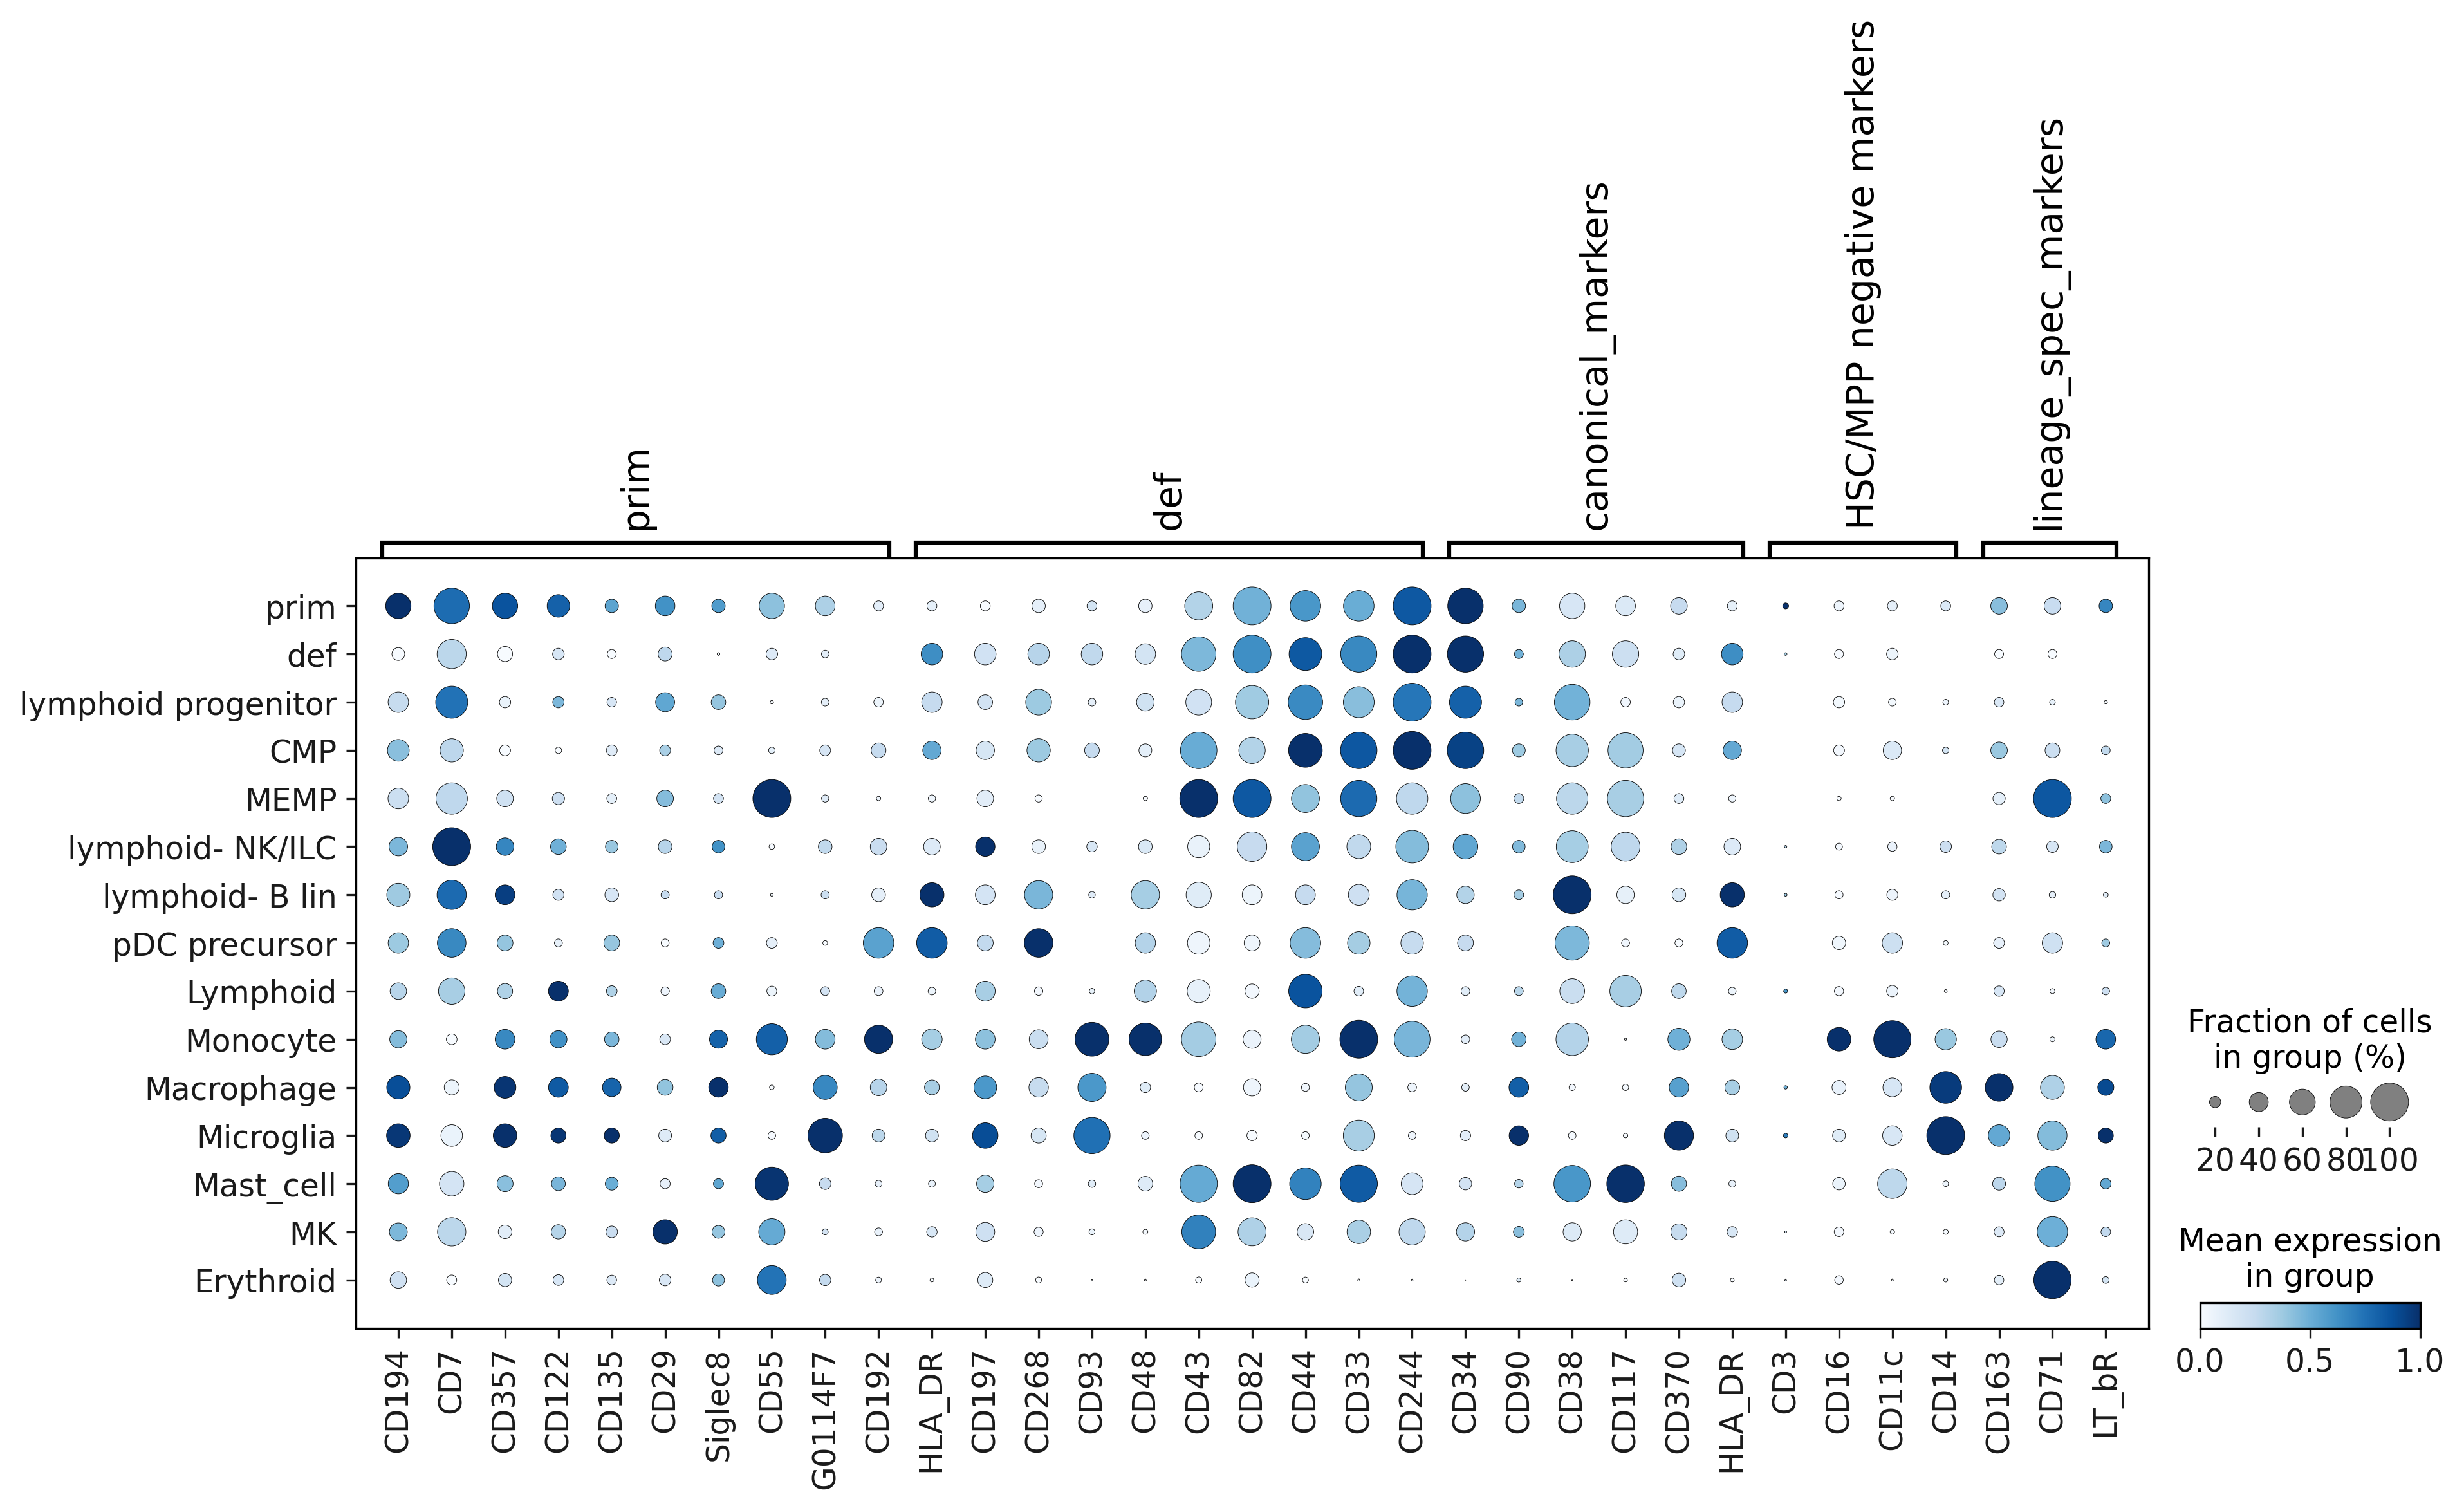

In [655]:
proteins = { 
 'prim': [
       'CD194',
       'CD7',
       'CD357',
       'CD122',

  'CD135',
  'CD29',
  'Siglec8',
           'CD55',
  'G0114F7',

       'CD192',

],

'def': [
  'HLA_DR',


  'CD197',

  'CD268',

  'CD93',
  'CD48',
      'CD43',
  'CD82',
      'CD44',
      'CD33',
  'CD244',
],
    
'canonical_markers' : [
'CD34',
'CD90',
    'CD38',
'CD117',
'CD370',
'HLA_DR',
],

'HSC/MPP negative markers' : [
'CD3',
'CD16',
'CD11c',
'CD14',
],
    
'lineage_spec_markers': [
  'CD163', # mac lineage
    'CD71', # ery lineage
      'LT_bR',
]
}

sc.pl.dotplot(ys_progen, cmap='Blues', var_names = proteins, groupby='cell_labels_lvl4_mixed', use_raw=False,standard_scale='var')

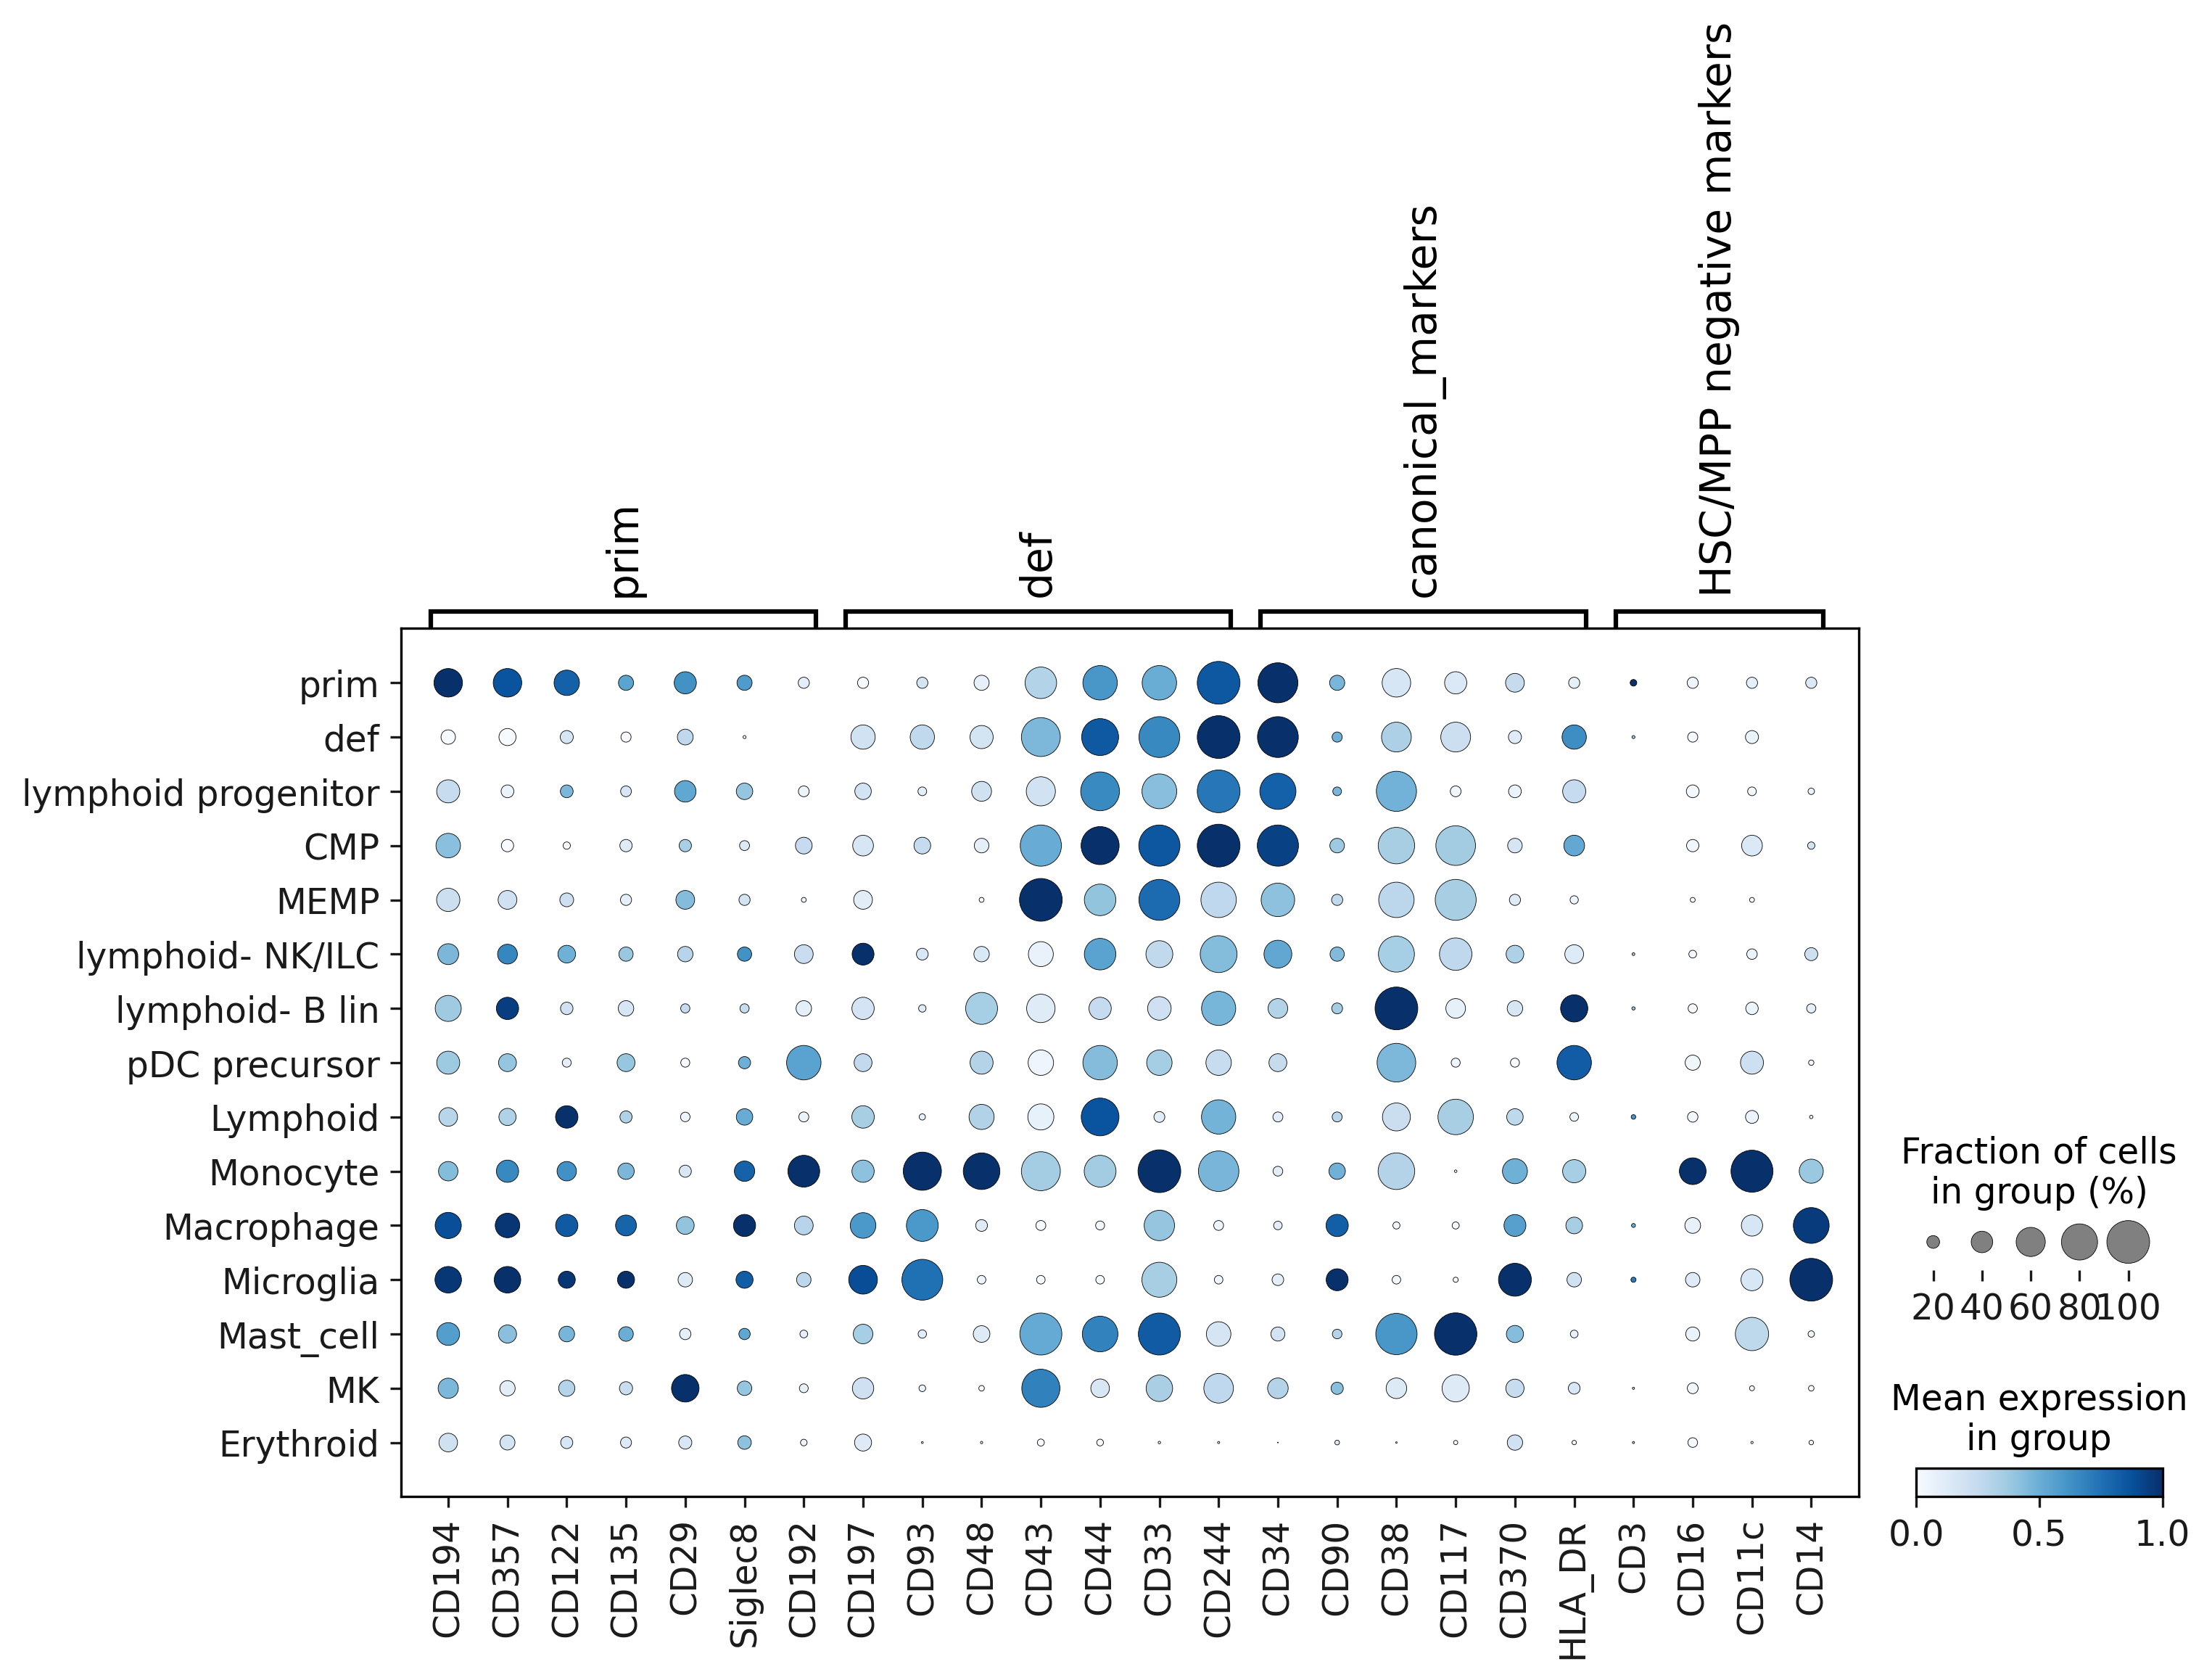

In [660]:
proteins = { 
 'prim': [
       'CD194',

       'CD357',
       'CD122',

  'CD135',
  'CD29',
  'Siglec8',
#           'CD55',
#  'G0114F7',

       'CD192',

],

'def': [
#  'HLA_DR',


  'CD197',

#  'CD268',

  'CD93',
  'CD48',
      'CD43',
#  'CD82',
      'CD44',
      'CD33',
  'CD244',
],
    
'canonical_markers' : [
'CD34',
'CD90',
    'CD38',
'CD117',
'CD370',
'HLA_DR',
],

'HSC/MPP negative markers' : [
'CD3',
'CD16',
'CD11c',
'CD14',
],
    
#'lineage_spec_markers': [
#       'CD7', # HSC
#  'CD163', # mac lineage
#    'CD71', # ery lineage
#      'LT_bR',
#]
}

sc.pl.dotplot(ys_progen, cmap='Blues', var_names = proteins, groupby='cell_labels_lvl4_mixed', use_raw=False,standard_scale='var')

# append liver HSC 

In [165]:
liv_hsc = sc.read('/nfs/team298/ar32/YS/Liver_Cite_Seq/Analysis/Protein/science_submission_1/Processed_liver_citeseq_20220616.h5ad')
liv_hsc = liv_hsc[liv_hsc.obs['ammendments_with_laura_20220615'].isin(['HSC'])]

liv_hsc.obs['cell_labels_lvl4_mixed'] = liv_hsc.obs['ammendments_with_laura_20220615'].astype(str) + '_liver'

/tmp/ipykernel_1024/1799757214.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  liv_hsc.obs['cell_labels_lvl4_mixed'] = liv_hsc.obs['ammendments_with_laura_20220615'].astype(str) + '_liver'


In [166]:
adata_list = [liv_hsc, ys_progen]
protein_ys_liv_prim_def = sc.AnnData.concatenate(*adata_list, join='inner', batch_categories=None ,index_unique=None)

/home/jovyan/my-conda-envs/YS_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [168]:
proteins = { 
 'prim': [
       'CD194',

       'CD357',
       'CD122',

  'CD135',
  'CD29',
  'Siglec8',
#           'CD55',
#  'G0114F7',

       'CD192',

],

'def': [
#  'HLA_DR',


  'CD197',

#  'CD268',

  'CD93',
  'CD48',
      'CD43',
#  'CD82',
      'CD44',
      'CD33',
  'CD244',
],
    
'canonical_markers' : [
'CD34',
'CD90',
    'CD38',
'CD117',
'CD370',
'HLA_DR',
],

'HSC/MPP negative markers' : [
'CD3',
'CD16',
'CD11c',
'CD14',
],
    
#'lineage_spec_markers': [
#       'CD7', # HSC
#  'CD163', # mac lineage
#    'CD71', # ery lineage
#      'LT_bR',
#]
}

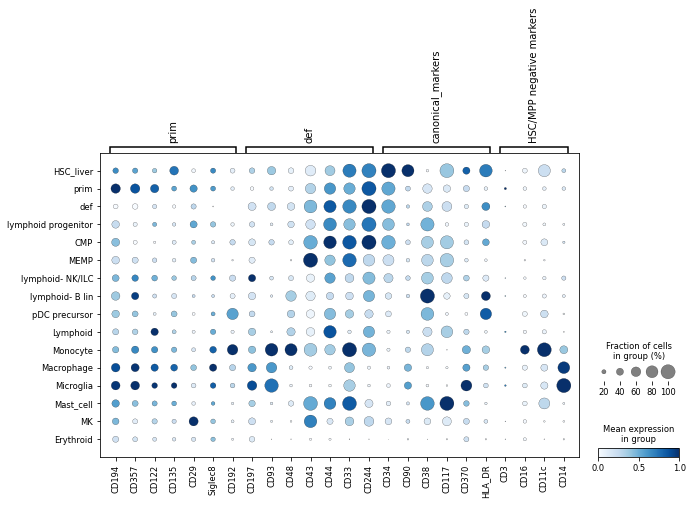

In [169]:
order = [
'HSC_liver',
'prim',
'def',
 'lymphoid progenitor', 
'CMP',
 'MEMP',
'lymphoid- NK/ILC',
'lymphoid- B lin',
 'pDC precursor', 
 'Lymphoid',
 'Monocyte',
'Macrophage',
 'Microglia',
 'Mast_cell',
 'MK', 
'Erythroid', ]
protein_ys_liv_prim_def.obs['cell_labels_lvl4_mixed'] = protein_ys_liv_prim_def.obs['cell_labels_lvl4_mixed'].astype('category').cat.reorder_categories(order)

sc.pl.dotplot(protein_ys_liv_prim_def, cmap='Blues', var_names = proteins, groupby='cell_labels_lvl4_mixed', use_raw=False,standard_scale='var', save='prim_def_protein_with_liv_HSC_20220622.pdf')

In [173]:
protein_ys_liv_prim_def.obs['cell_labels_lvl5_mixed'] = protein_ys_liv_prim_def.obs['cell_labels_lvl4_mixed'].astype(str)

protein_ys_liv_prim_def.obs.loc[protein_ys_liv_prim_def.obs['cell_labels_lvl4_mixed'].isin(['prim','def']),'cell_labels_lvl5_mixed'] = protein_ys_liv_prim_def.obs.loc[protein_ys_liv_prim_def.obs['cell_labels_lvl4_mixed'].isin(['prim','def']),'cell_labels_lvl5_mixed'] +'_' + protein_ys_liv_prim_def.obs.loc[protein_ys_liv_prim_def.obs['cell_labels_lvl4_mixed'].isin(['prim','def']),'cell_labels_lvl2'].astype(str)

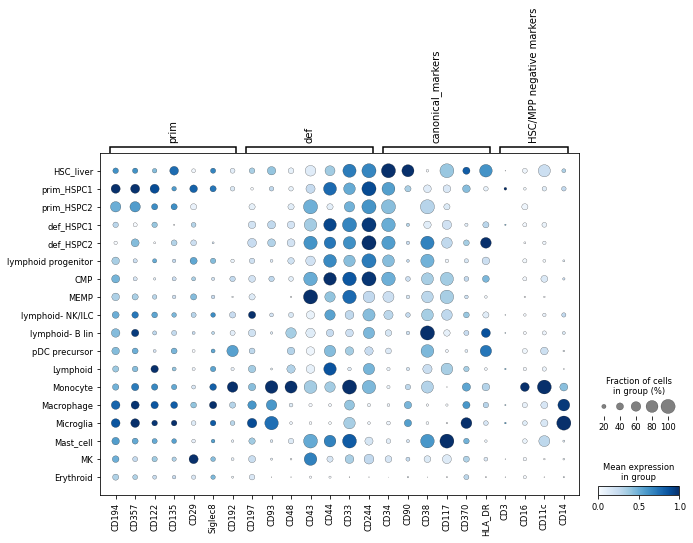

In [175]:
order = [
'HSC_liver',
'prim_HSPC1',
 'prim_HSPC2',
 'def_HSPC1',
 'def_HSPC2',
 'lymphoid progenitor', 
'CMP',
 'MEMP',
'lymphoid- NK/ILC',
'lymphoid- B lin',
 'pDC precursor', 
 'Lymphoid',
 'Monocyte',
'Macrophage',
 'Microglia',
 'Mast_cell',
 'MK', 
'Erythroid', ]
protein_ys_liv_prim_def.obs['cell_labels_lvl5_mixed'] = protein_ys_liv_prim_def.obs['cell_labels_lvl5_mixed'].astype('category').cat.reorder_categories(order)

sc.pl.dotplot(protein_ys_liv_prim_def, cmap='Blues', var_names = proteins, groupby='cell_labels_lvl5_mixed', use_raw=False,standard_scale='var', save='prim_def_split_HSPC1_2_protein_with_liv_HSC_20220624.pdf')

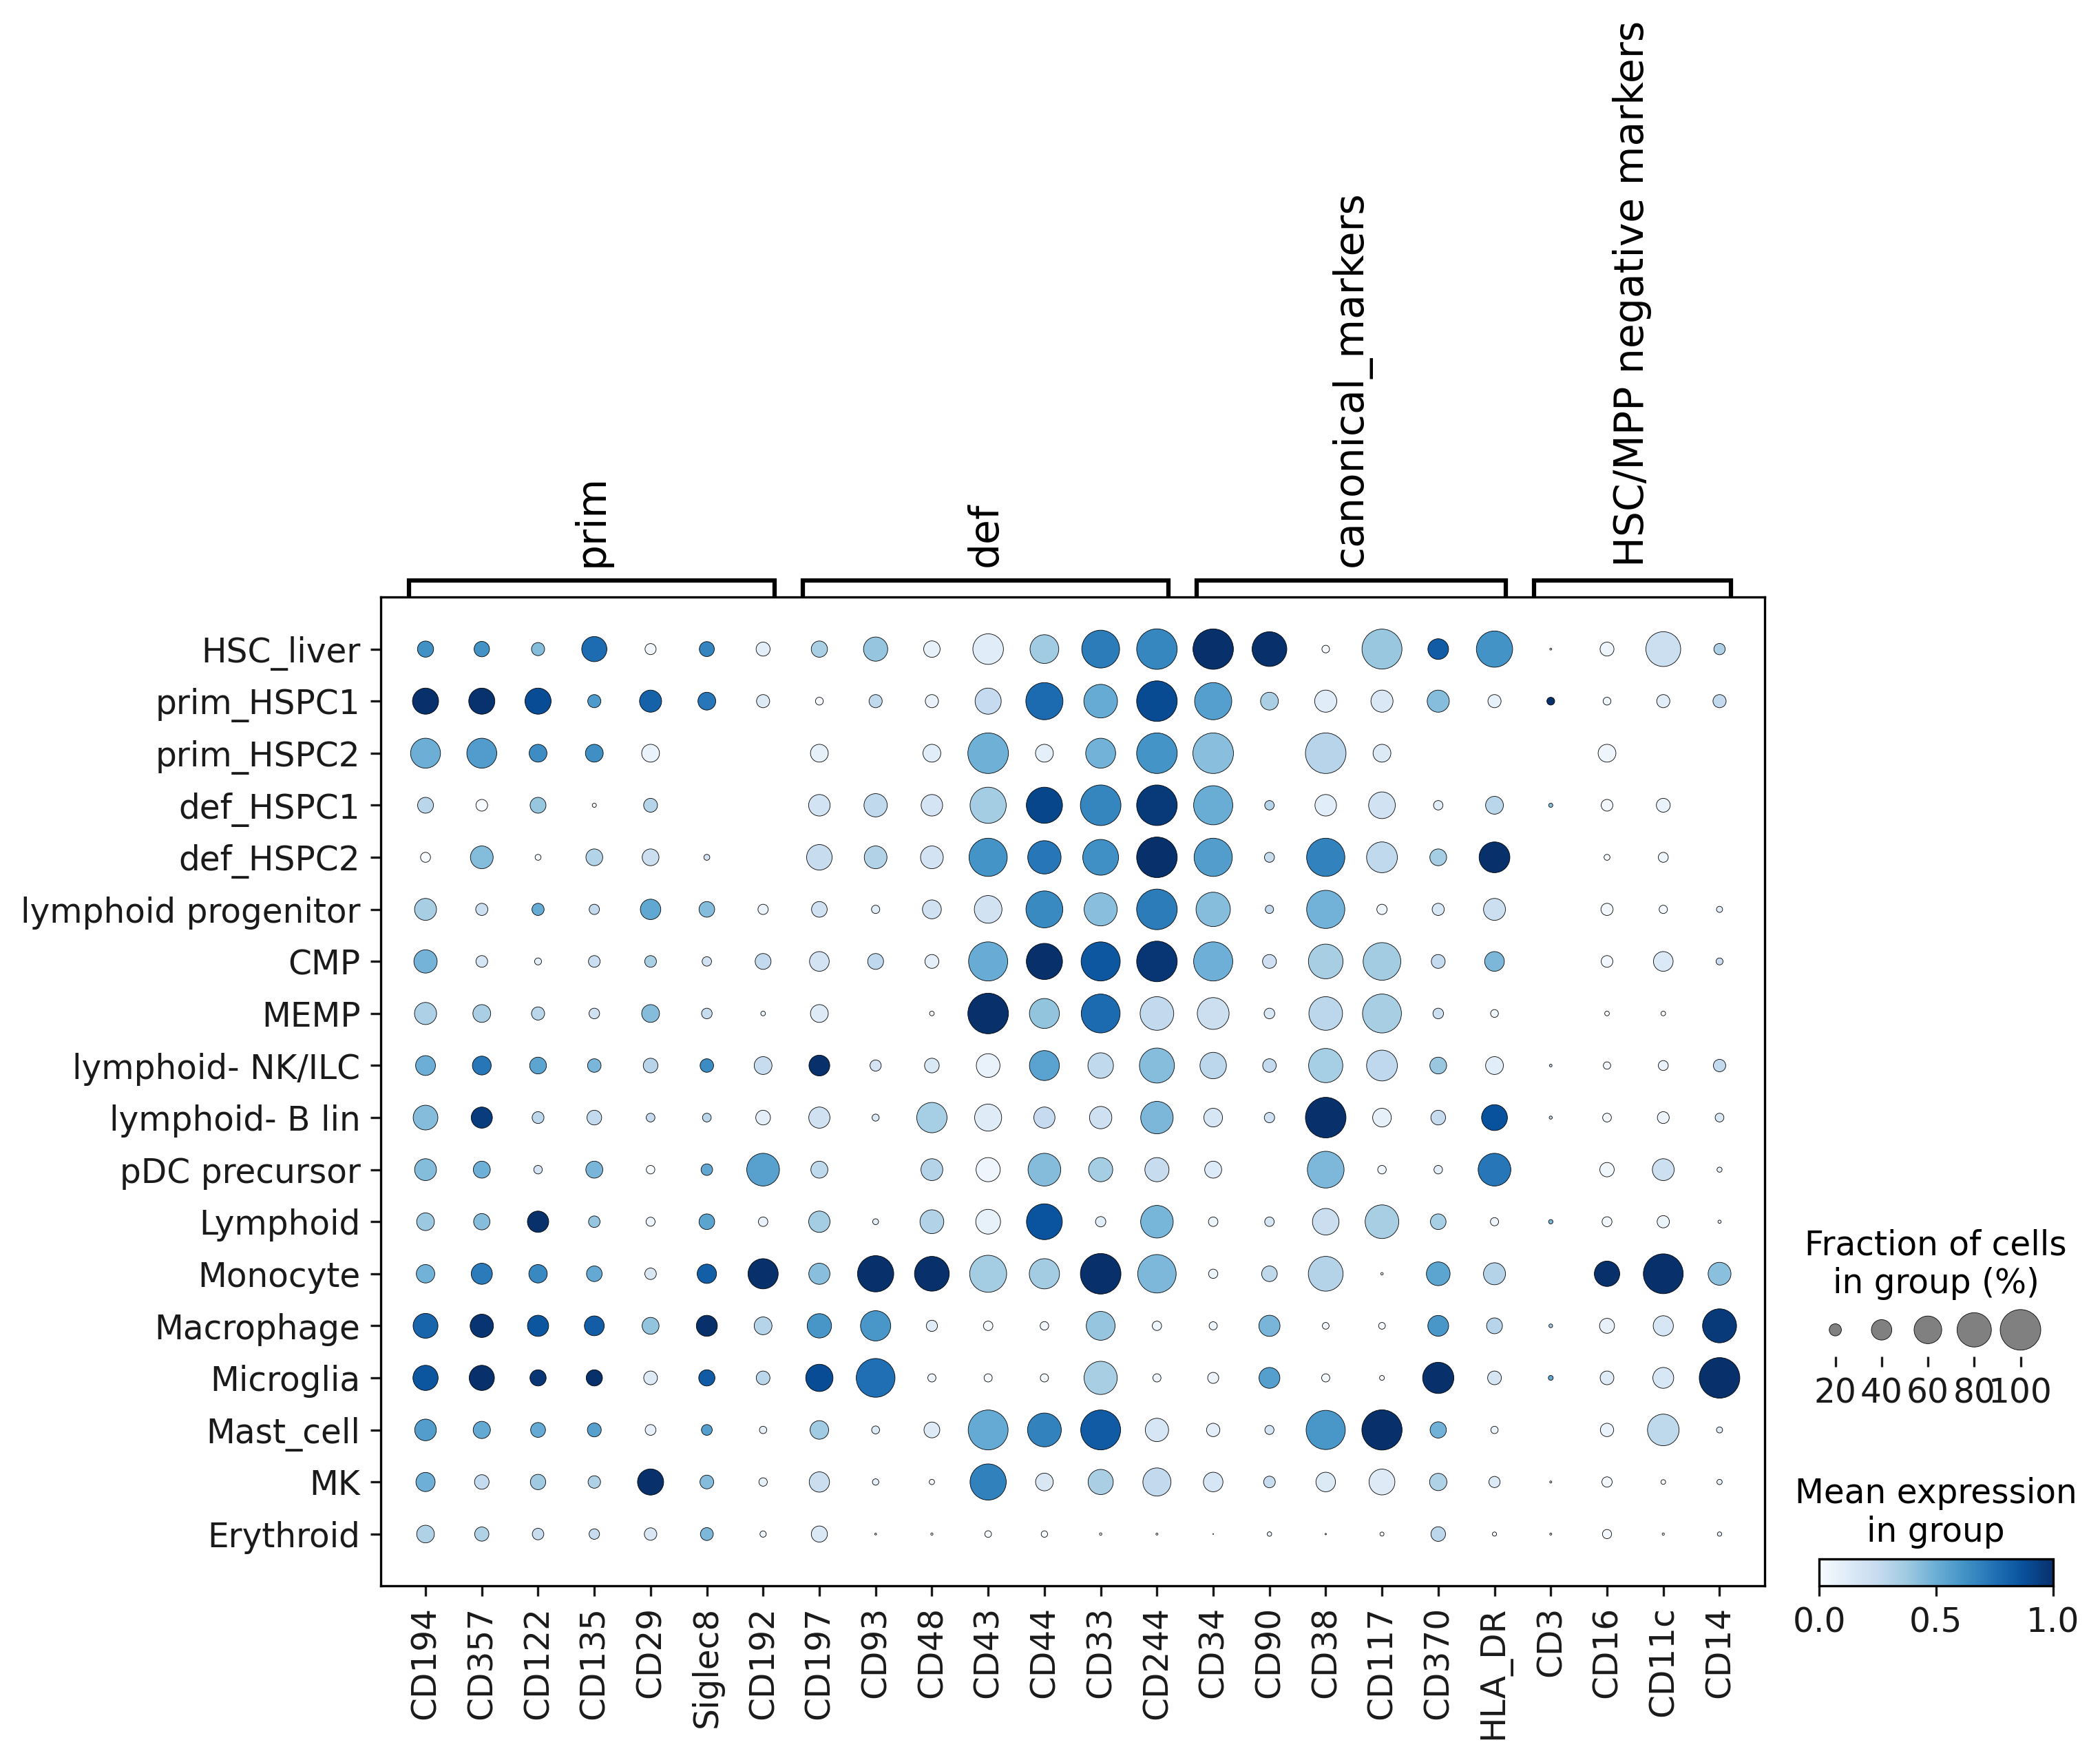

In [694]:
order = [
'HSC_liver',
'prim_HSPC1',
 'prim_HSPC2',
 'def_HSPC1',
 'def_HSPC2',
 'lymphoid progenitor', 
'CMP',
 'MEMP',
'lymphoid- NK/ILC',
'lymphoid- B lin',
 'pDC precursor', 
 'Lymphoid',
 'Monocyte',
'Macrophage',
 'Microglia',
 'Mast_cell',
 'MK', 
'Erythroid', ]
protein_ys_liv_prim_def.obs['cell_labels_lvl5_mixed'] = protein_ys_liv_prim_def.obs['cell_labels_lvl5_mixed'].astype('category').cat.reorder_categories(order)

sc.pl.dotplot(protein_ys_liv_prim_def, cmap='Blues', var_names = proteins, groupby='cell_labels_lvl5_mixed', use_raw=False,standard_scale='var', save='prim_def_split_HSPC1_2_protein_with_liv_HSC_20220624.pdf')